# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")



# Display the data table for preview
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
num_mice = merged_data['Mouse ID'].nunique()
print("Number of mice: ", num_mice)


Number of mice:  249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data[merged_data.duplicated(['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
print("Duplicate mice IDs: ", duplicate_mice)


Duplicate mice IDs:  ['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id = 'g989'

duplicate_mouse_data = merged_data.loc[merged_data['Mouse ID'] == duplicate_mouse_id]
print(duplicate_mouse_data)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = clean_data[clean_data['Mouse ID'] != 'g989']


In [8]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = clean_data['Mouse ID'].nunique()
print("Number of mice in the clean DataFrame: ", num_mice_clean)



Number of mice in the clean DataFrame:  248


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_stats = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).reset_index()

summary_stats.columns = ['Drug Regimen', 'Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']

print(summary_stats)



  Drug Regimen       Mean     Median   Variance  Standard Deviation       SEM
0    Capomulin  40.675741  41.557809  24.947764            4.994774  0.329346
1     Ceftamin  52.591172  51.776157  39.290177            6.268188  0.469821
2    Infubinol  52.884795  51.820584  43.128684            6.567243  0.492236
3     Ketapril  55.235638  53.698743  68.553577            8.279709  0.603860
4     Naftisol  54.331565  52.509285  66.173479            8.134708  0.596466
5      Placebo  54.033581  52.288934  61.168083            7.821003  0.581331
6     Propriva  52.320930  50.446266  43.852013            6.622085  0.544332
7     Ramicane  40.216745  40.673236  23.486704            4.846308  0.320955
8     Stelasyn  54.233149  52.431737  59.450562            7.710419  0.573111
9    Zoniferol  53.236507  51.818479  48.533355            6.966589  0.516398


## Bar and Pie Charts

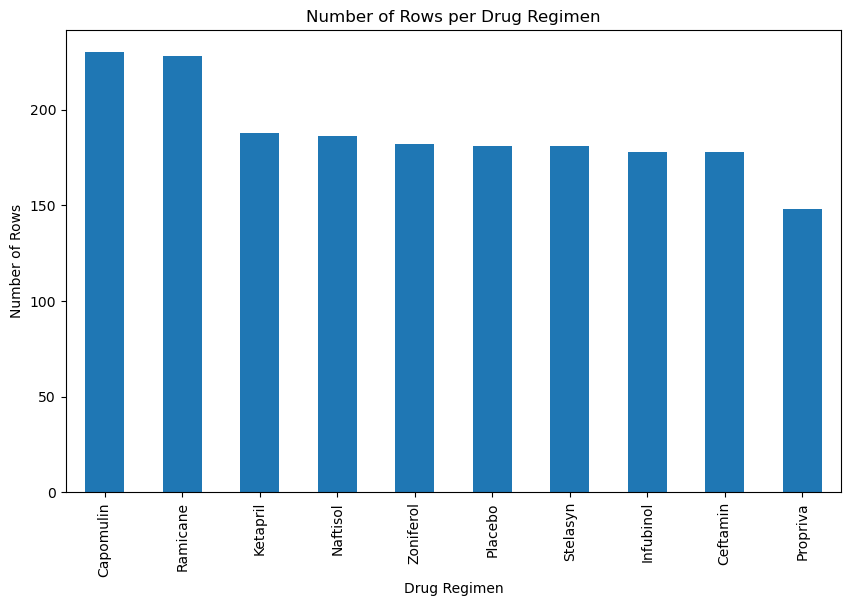

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Count the number of rows for each drug regimen
drug_counts = clean_data['Drug Regimen'].value_counts()

# Create a bar plot
drug_counts.plot(kind='bar', figsize=(10, 6))

# Set the plot title and axis labels
plt.title("Number of Rows per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows")

# Display the plot
plt.show()



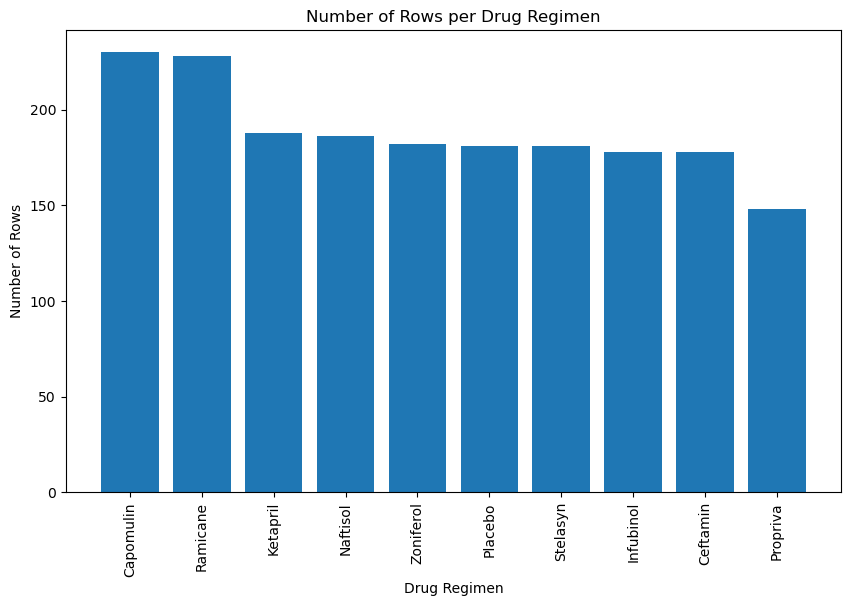

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Count the number of rows for each drug regimen
drug_counts = clean_data['Drug Regimen'].value_counts()

# Get the drug regimens and their corresponding counts
regimens = drug_counts.index
counts = drug_counts.values

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(regimens, counts)

# Set the plot title and axis labels
plt.title("Number of Rows per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows")

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()



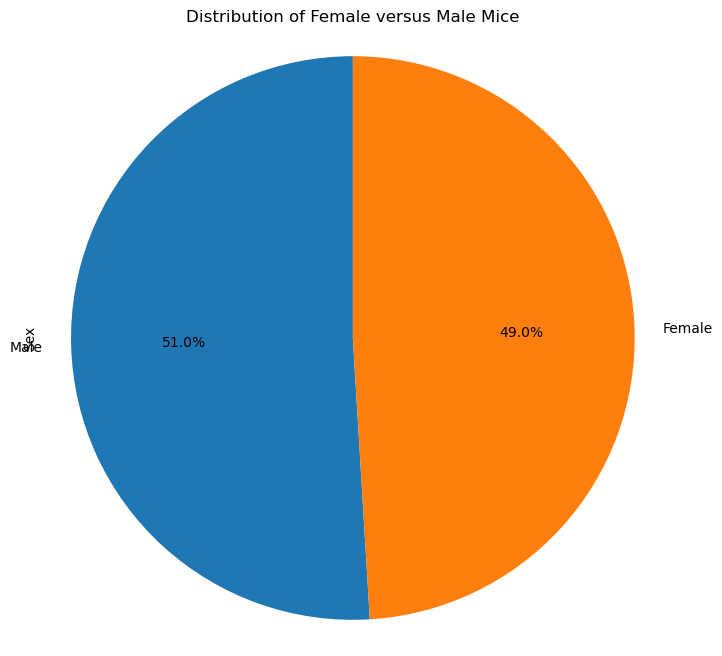

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Count the number of female and male mice
sex_counts = clean_data['Sex'].value_counts()

# Create a pie plot
sex_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8, 8))

# Set the plot title
plt.title("Distribution of Female versus Male Mice")

# Set the aspect ratio to be equal to make it a circle
plt.axis('equal')

# Display the plot
plt.show()


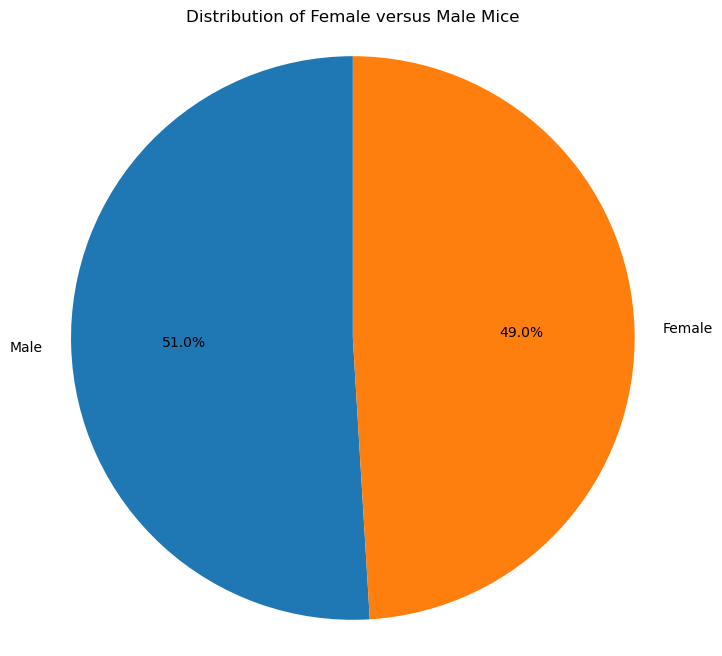

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
import matplotlib.pyplot as plt

# Count the number of female and male mice
sex_counts = clean_data['Sex'].value_counts()

# Get the sex labels and their corresponding counts
sex_labels = sex_counts.index
sex_values = sex_counts.values

# Create the pie plot
plt.figure(figsize=(8, 8))
plt.pie(sex_values, labels=sex_labels, autopct='%1.1f%%', startangle=90)

# Set the plot title
plt.title("Distribution of Female versus Male Mice")

# Set the aspect ratio to be equal to make it a circle
plt.axis('equal')

# Display the plot
plt.show()



## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume_df = clean_data.loc[clean_data['Drug Regimen'].isin(treatment_regimens)]


# Start by getting the last (greatest) timepoint for each mouse

last_timepoint = final_tumor_volume_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_df = pd.merge(last_timepoint, final_tumor_volume_df, on=['Mouse ID', 'Timepoint'])


In [15]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = merged_df.loc[merged_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add the tumor volume data to the list
    tumor_volume_data.append(tumor_volumes)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine the lower and upper bounds for potential outliers
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    # Check for potential outliers
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Print the results
    print(f"--- {treatment} ---")
    print(f"Lower Quartile: {lower_quartile}")
    print(f"Upper Quartile: {upper_quartile}")
    print(f"IQR: {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Potential Outliers: {outliers}\n")


--- Capomulin ---
Lower Quartile: 32.37735684
Upper Quartile: 40.1592203
IQR: 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

--- Ramicane ---
Lower Quartile: 31.56046955
Upper Quartile: 40.65900627
IQR: 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

--- Infubinol ---
Lower Quartile: 54.04860769
Upper Quartile: 65.52574285
IQR: 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Potential Outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64

--- Ceftamin ---
Lower Quartile: 48.72207785
Upper Quartile: 64.29983003
IQR: 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



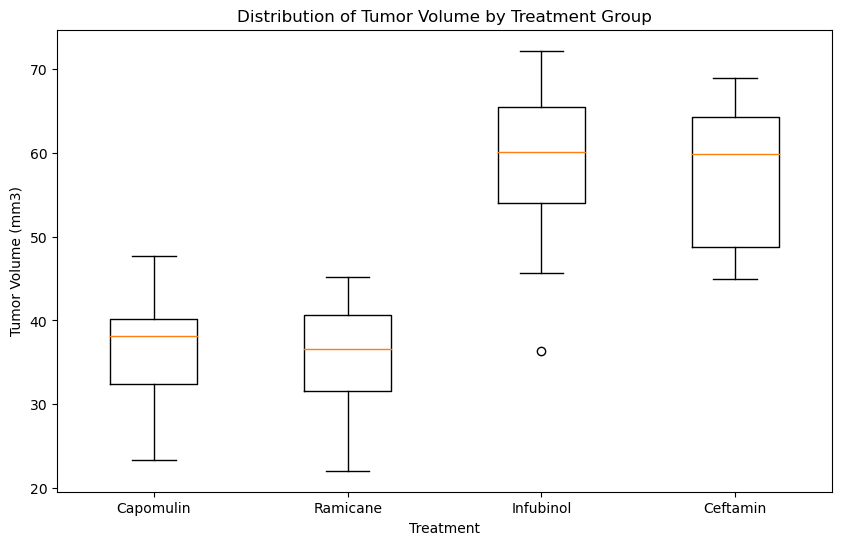

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


# Create a list of tumor volume data for each treatment group
tumor_volume_data = [merged_df.loc[merged_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
                     for treatment in treatments]

# Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volume_data, labels=treatments)

# Set the plot title and axis labels
plt.title('Distribution of Tumor Volume by Treatment Group')
plt.xlabel('Treatment')
plt.ylabel('Tumor Volume (mm3)')

# Display the plot
plt.show()


## Line and Scatter Plots

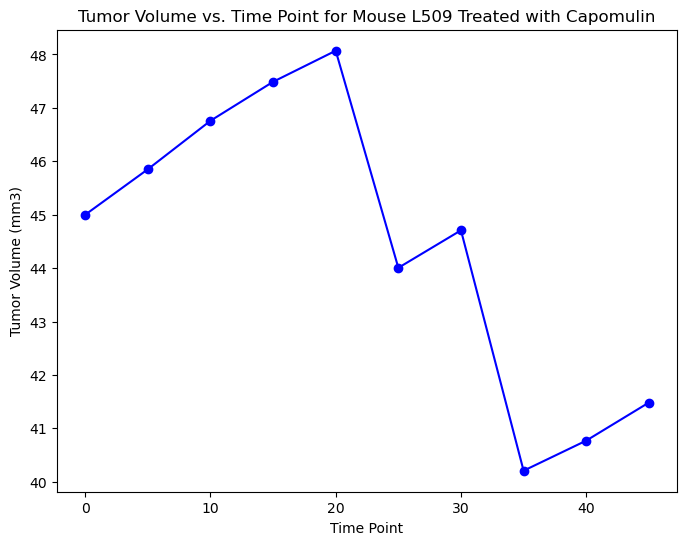

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


# Select the mouse with Mouse ID 'l509' treated with Capomulin
selected_mouse = clean_data.loc[(clean_data['Drug Regimen'] == 'Capomulin') & (clean_data['Mouse ID'] == 'l509')]

# Extract the time points and tumor volumes
time_points = selected_mouse['Timepoint']
tumor_volumes = selected_mouse['Tumor Volume (mm3)']

# Create the line plot
plt.figure(figsize=(8, 6))
plt.plot(time_points, tumor_volumes, marker='o', linestyle='-', color='b')

# Set the plot title and axis labels
plt.title('Tumor Volume vs. Time Point for Mouse L509 Treated with Capomulin')
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')

# Display the plot
plt.show()


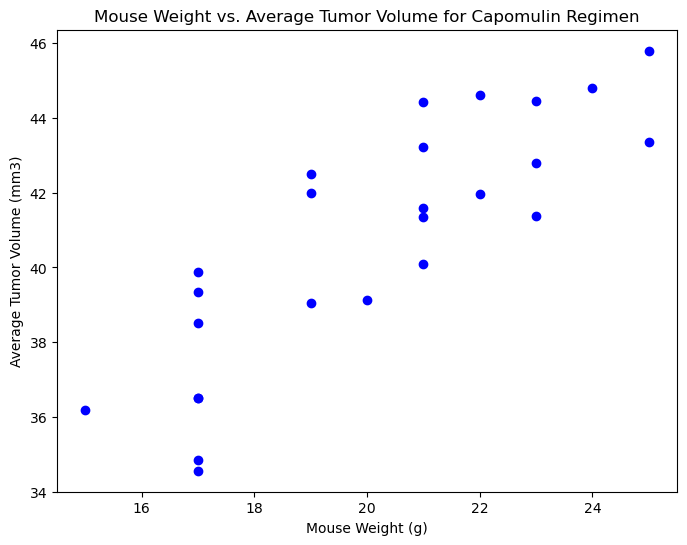

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_data = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].unique().str[0]

import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(mouse_weights, average_tumor_volume, marker='o', color='b')

# Set the plot title and axis labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the plot
plt.show()



## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the correlation coefficient
correlation = st.pearsonr(mouse_weights, average_tumor_volume)[0]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(mouse_weights, average_tumor_volume)

# Print the correlation coefficient and regression results
print("Correlation Coefficient: ", correlation)
print("Linear Regression Results:")
print("Slope:", slope)
print("Intercept:", intercept)
print("R-value:", rvalue)
print("P-value:", pvalue)
print("Standard Error:", stderr)


Correlation Coefficient:  0.841936342469472
Linear Regression Results:
Slope: 0.9544396890241049
Intercept: 21.552160532685008
R-value: 0.8419363424694721
P-value: 1.3225722434712404e-07
Standard Error: 0.12754359033201323


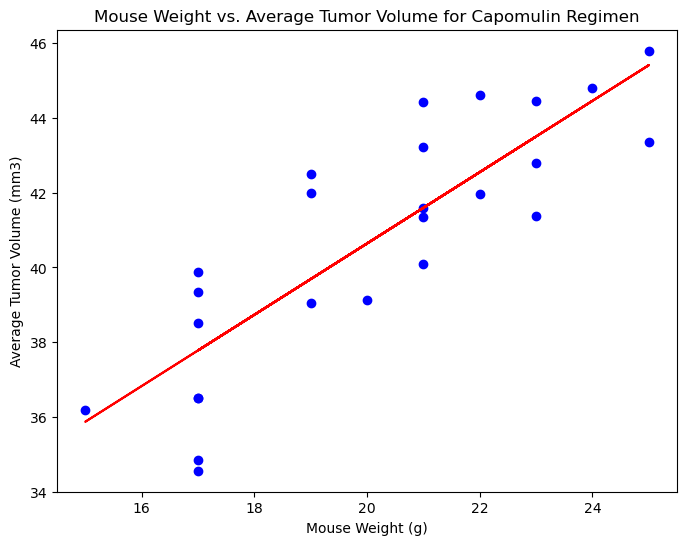

In [21]:

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(mouse_weights, average_tumor_volume, marker='o', color='b')

# Plot the line of correlation
plt.plot(mouse_weights, slope * mouse_weights + intercept, color='r')

# Set the plot title and axis labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the plot
plt.show()